# Bridging the gap: model mixing with Gaussian processes

## Alexandra Semposki

### Date: 29 October 2021

In [1]:
import numpy as np
import GPy as gp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mixing import Mixing, Switching, Models
from discrepancy import Discrepancy
from gaussprocess import GP

matplotlib.rcParams.update({
   'font.family': 'serif',
   'text.usetex': True,
})

Welcome to the BMM sandbox! Here you get to play!
Select a dpi for the figure.100


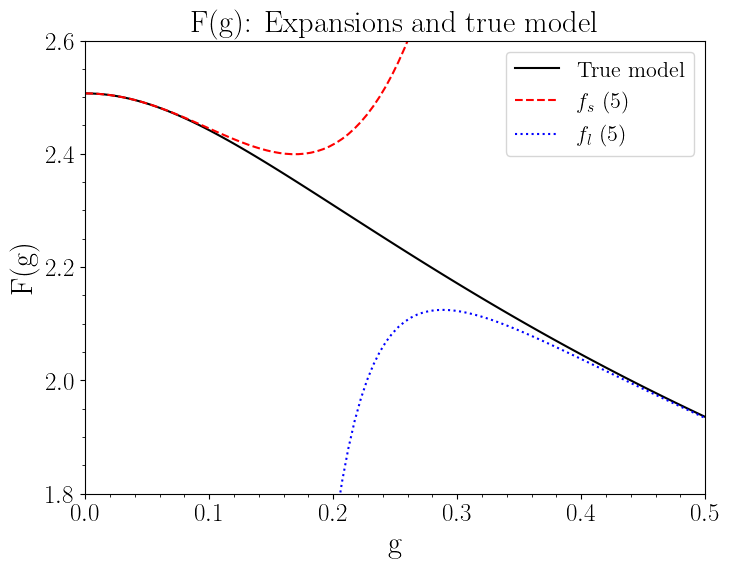

Would you like to save this figure? (yes/no)no


In [2]:
#first we need to see which models we want to mix
models = Mixing()
g = np.linspace(1e-6, 0.5, 100)
low = np.array([5])
high = np.array([5])
models.plot_models(g, low, high)

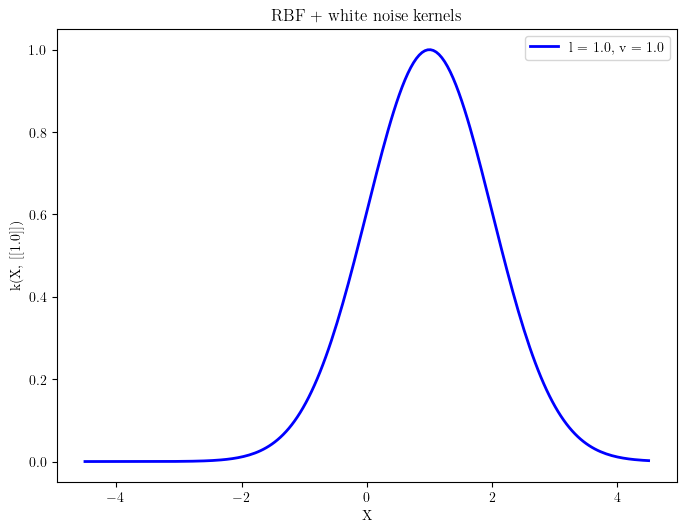

In [3]:
#begin by calling the GP class just to see if it works
new = GP()

After loading the GP we wish to get some data from the models and try to emulate between the two. Let's take some data and plot it.

0.25757624242424243
Which error model do you want to use? (uninformative/informative)informative
Small-g expansion: error will be on the order of g^6.
[ 0.          0.         -0.4699928   0.          0.51405463  0.        ]
Large-g expansion: error will be of the order g^6.
[ 1.81280495 -1.08599728  0.90640248 -0.81449796  0.7553354  -0.71268571]
Set a dpi for the figure.100


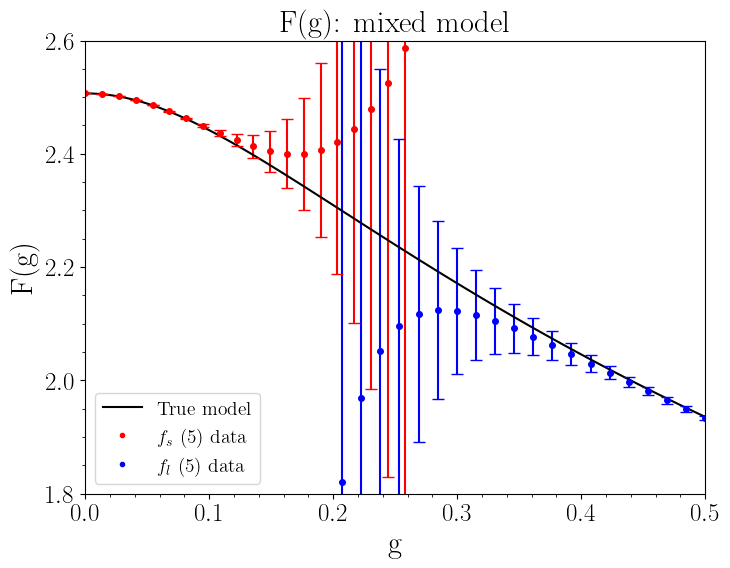

Would you like to save this figure? (yes/no)no
(40,)


In [4]:
gdata, data, sigma = new.model_data(g, low, high)
print(np.shape(gdata))


Name : GP regression
Objective : -20.399706073557795
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  sum.rbf.variance         |       5.464805176599097  |      +ve      |        
  sum.rbf.lengthscale      |      2.1924046552975462  |      +ve      |        
  sum.white.variance       |  0.00043671337332095475  |      +ve      |        
  Gaussian_noise.variance  |  0.00043671337332095475  |      +ve      |        


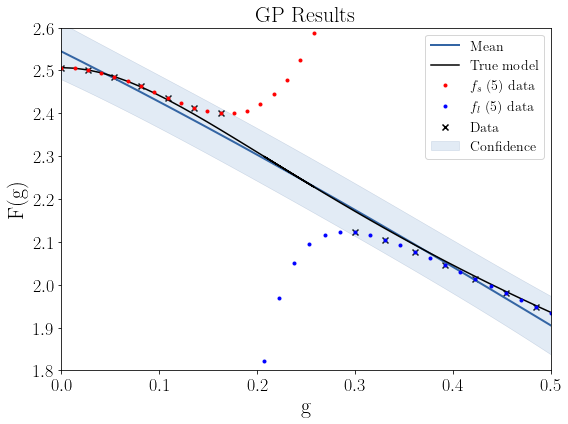

Would you like to save this figure? (yes/no)no


In [5]:
trained = new.training(gdata, data, low, high)

In [6]:
#calculate log likelihood
log_likelihood = trained.log_likelihood()
print("\nLog likelihood: ", log_likelihood)


Log likelihood:  20.399706073557795


Now we use the training results to predict across the gap with new points. 

Set a dpi for the figure.200


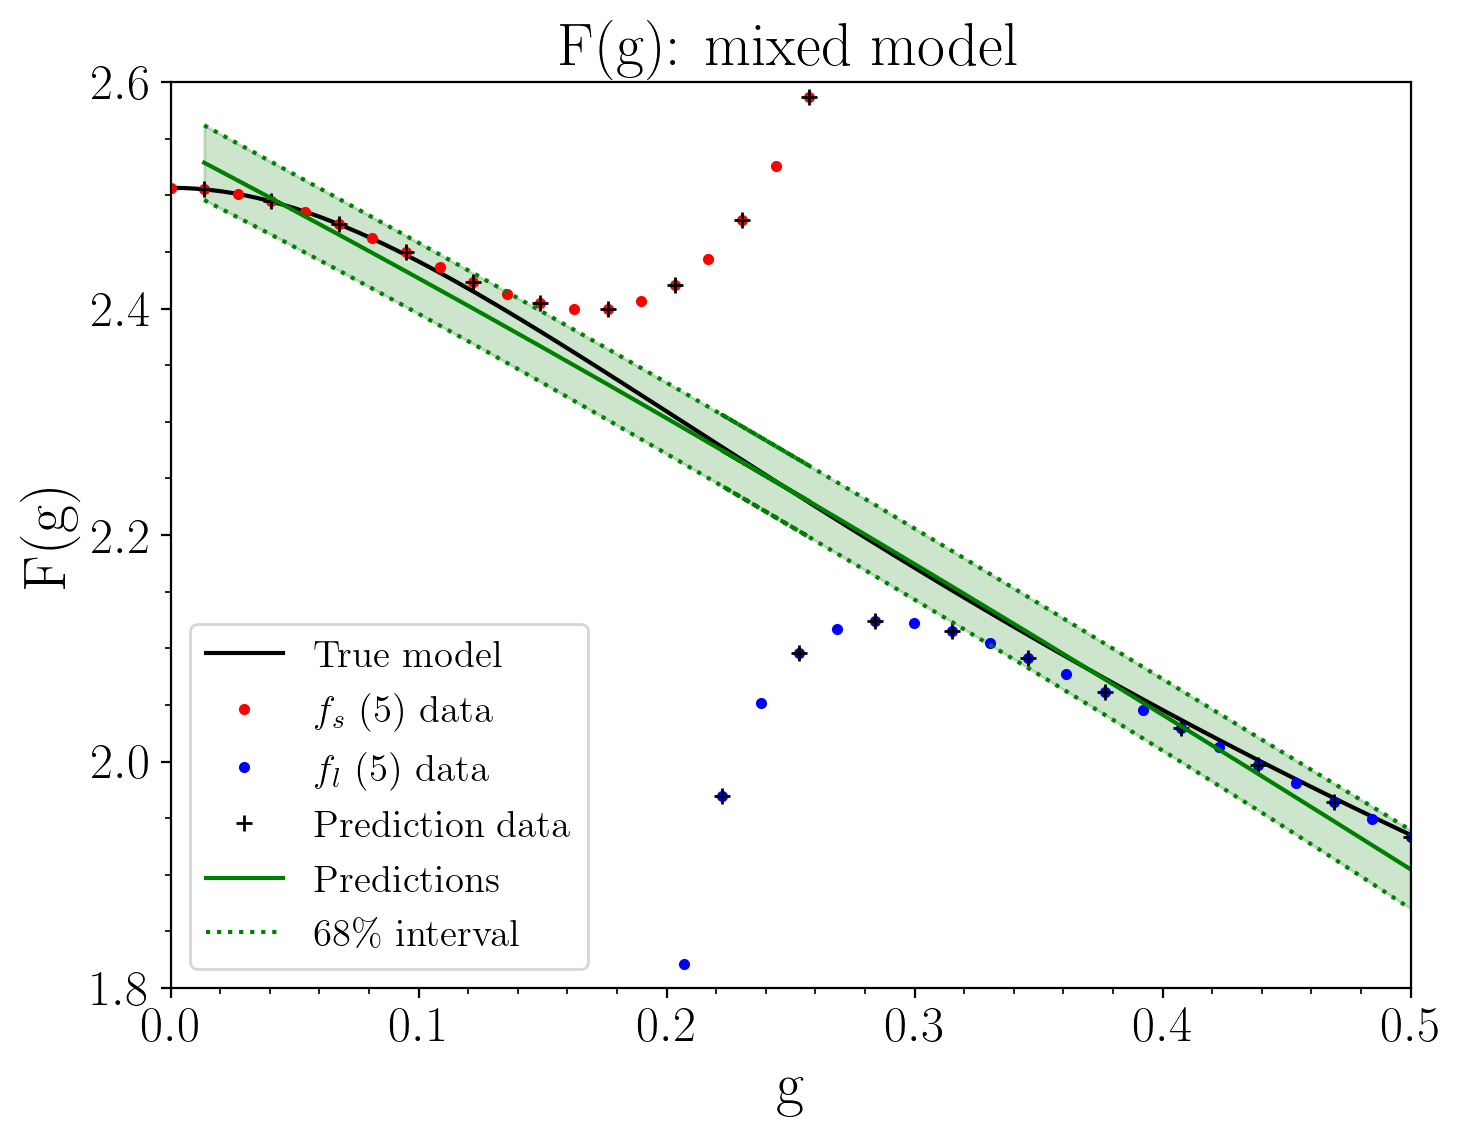

Would you like to save this figure? (yes/no)no


In [7]:
mean, var = new.validate(trained, g, gdata, data, low, high)

In [8]:
print(var)

[0.00108935 0.00103374 0.00100091 0.00098452 0.00097911 0.00098018
 0.00098409 0.00098817 0.00099068 0.00099079 0.00099017 0.00099093
 0.00098869 0.0009849  0.00098255 0.00098622 0.00100203 0.00103761
 0.00110212 0.00120619]


Need to work on figuring out the weird central region that looks like it's overlapping.